In [3]:
# One time use - upgrade pip and install packages
# import sys
# !{sys.executable} -m pip install --upgrade pip
# !{sys.executable} -m pip install findspark
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install seaborn

In [4]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [5]:
# May or may not need to execute this AGAIN based on the mood of the server.
# https://stackoverflow.com/a/55435955/10844976
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

In [6]:
# 2.3
df = spark.read.option("header",True).option("inferSchema",True).csv('../dataset/cardio_train_preprocessed.csv')
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- cardio: integer (nullable = true)



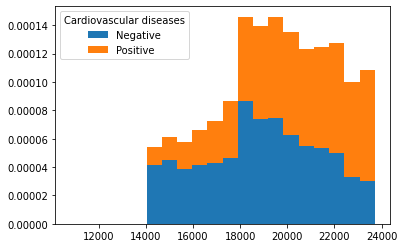

In [7]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

n_bins = 20
pds = df.toPandas()
df_cardio_0 = pds[pds["cardio"]==0]
df_cardio_1 = pds[pds["cardio"]==1]
df_cardio_label = ["Negative", "Positive"]
x = [df_cardio_0["age"], df_cardio_1["age"]]

plt.hist(x, n_bins, density=True, histtype='bar', stacked=True, label=df_cardio_label)
plt.legend(title='Cardiovascular diseases')
plt.show()

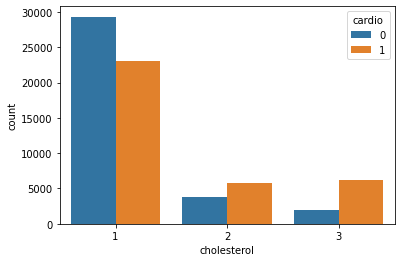

In [8]:
import seaborn as sns
ax = sns.countplot(x="cholesterol",hue="cardio",data=pds)
plt.show()

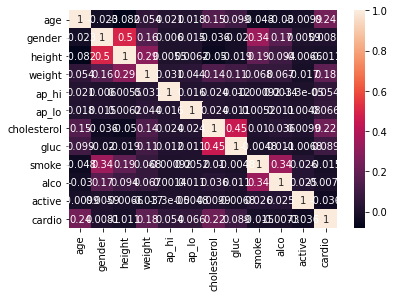

In [9]:
corr = df.toPandas().drop(["id"], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot=True)
plt.show()

In [10]:
# Reference: https://stackoverflow.com/a/44631639/10844976
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|  0|     0|     0|     0|    0|    0|          0|   0|    0|   0|     0|     0|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+



In [11]:
# import pyspark.sql.functions as f
# df_mean = df.select(*[f.mean(c).alias(c) for c in df.columns])
# df_stddev = df.select(*[f.stddev(c).alias(c) for c in df.columns])
# df.select([count((c - f.mean(c)) / f.stddev(c)).alias(c) for c in df.columns]).show()

import numpy as np
from scipy import stats

pds = df.toPandas()
z_score = np.abs(stats.zscore(pds))
outliers = sum(z_score > 3)
pretty_outliers = list(zip(pds.columns, outliers))

<AxesSubplot:xlabel='age'>

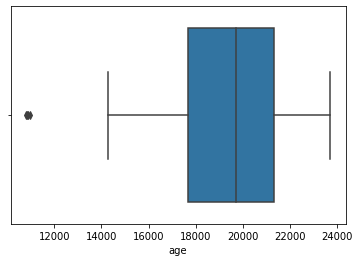

In [12]:
sns.boxplot(x=pds['age'])

In [13]:
df.select("age").orderBy(col("age").asc()).limit(20).show()
df.select("age").orderBy(col("age").desc()).limit(20).show()

+-----+
|  age|
+-----+
|10798|
|10859|
|10878|
|10964|
|14275|
|14277|
|14282|
|14284|
|14287|
|14291|
|14291|
|14291|
|14292|
|14293|
|14293|
|14294|
|14294|
|14295|
|14295|
|14296|
+-----+

+-----+
|  age|
+-----+
|23713|
|23701|
|23692|
|23690|
|23687|
|23684|
|23678|
|23677|
|23675|
|23675|
|23673|
|23673|
|23672|
|23670|
|23670|
|23670|
|23668|
|23668|
|23668|
|23667|
+-----+



<AxesSubplot:xlabel='height'>

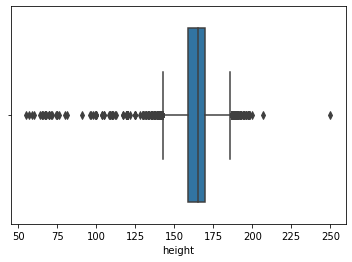

In [14]:
sns.boxplot(x=pds['height'])

In [15]:
df.select("height").orderBy(col("height").asc()).limit(20).show()

+------+
|height|
+------+
|    55|
|    57|
|    59|
|    60|
|    64|
|    65|
|    65|
|    66|
|    67|
|    67|
|    67|
|    68|
|    68|
|    70|
|    70|
|    70|
|    71|
|    72|
|    74|
|    75|
+------+



<AxesSubplot:xlabel='weight'>

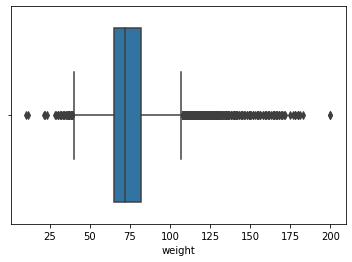

In [16]:
sns.boxplot(x=pds['weight'])

<AxesSubplot:xlabel='ap_hi'>

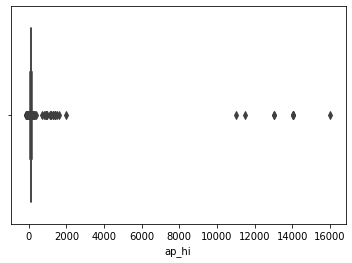

In [17]:
sns.boxplot(x=pds['ap_hi'])

In [18]:
df.select("ap_hi").orderBy(col("ap_hi").desc()).limit(20).show()

+-----+
|ap_hi|
+-----+
|16020|
|14020|
|14020|
|14020|
|14020|
|13010|
|13010|
|11500|
|11020|
| 2000|
| 1620|
| 1500|
| 1420|
| 1420|
| 1409|
| 1400|
| 1400|
| 1400|
| 1300|
| 1300|
+-----+



<AxesSubplot:xlabel='ap_hi'>

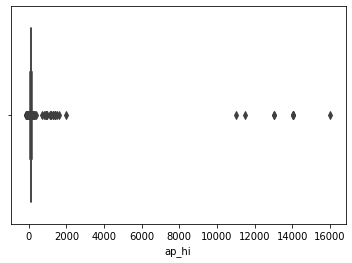

In [19]:
sns.boxplot(x=pds['ap_hi'])

In [20]:
id_to_remove = np.where((z_score[:,5]>3) | (z_score[:,6]>3))
id_col = pds.drop(pds.index[id_to_remove], inplace=False, axis=0)['id']
df_remove_outliers = df.filter(df.id.isin(id_col.tolist()))
#id_to_remove

# pds[pds.index.isin(id_to_remove[0].tolist())]
#id_col.tolist()

#pds.filter(pds.index[id_to_remove])

#pds.mask(pds.index.isin(id_to_remove[0].tolist()))


#id_col

#pds['id'].isin([2,4,5])

In [21]:
df_remove_outliers.select("ap_hi").orderBy(col("ap_hi").desc()).limit(20).show()

+-----+
|ap_hi|
+-----+
|  401|
|  309|
|  240|
|  240|
|  240|
|  240|
|  240|
|  240|
|  240|
|  230|
|  220|
|  220|
|  220|
|  220|
|  220|
|  220|
|  220|
|  220|
|  220|
|  220|
+-----+



In [22]:
# https://www.xspdf.com/resolution/51834094.html#:~:text=Pyspark%20count%20number%20of%20distinct%20values%20in%20column&text=Distinct%20value%20of%20the%20column,distinct%20value%20of%20the%20column.
#from pyspark.sql.functions import countDistinct

#df_remove_outliers.select(countDistinct(col(c)).alias(c) for c in df_remove_outliers.columns)

df_remove_outliers.toPandas().nunique(axis=0)

id             69011
age             8067
gender             2
height           108
weight           281
ap_hi            126
ap_lo             97
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [23]:
# 3.3
df_remove_outliers = df_remove_outliers.withColumn('high_blood_pressure',
                                                   (df_remove_outliers.ap_hi >= 140) & (df_remove_outliers.ap_lo >= 90))

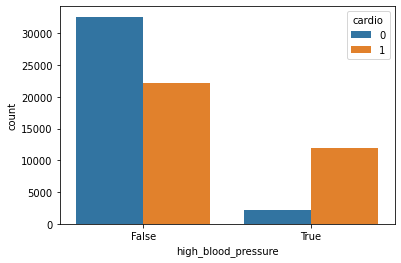

In [24]:
sns.countplot(x="high_blood_pressure",hue="cardio",data=df_remove_outliers.toPandas())
plt.show()

In [25]:
columns_to_drop = ['ap_hi','ap_lo']
df_remove_outliers = df_remove_outliers.drop(*columns_to_drop)

In [26]:
# 3.4
# inner_join = df1.join(df2, df1.id == df2.id)

In [27]:
# df1 = df1.unionByName(df2)

In [28]:
# 3.5
df_remove_outliers.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- cardio: integer (nullable = true)
 |-- high_blood_pressure: boolean (nullable = true)



In [29]:
df_typed = df_remove_outliers # Rename
df_typed = df_typed.withColumn('is_female', (df_typed.gender == 1))
df_typed = df_typed.withColumn('is_smoke', (df_typed.smoke == 1))
df_typed = df_typed.withColumn('is_alco', (df_typed.alco == 1))
df_typed = df_typed.withColumn('is_active', (df_typed.active == 1))
df_typed = df_typed.withColumn('is_cardio', (df_typed.cardio == 1))
columns_to_drop = ['gender','smoke','alco','active','cardio']
df_typed = df_typed.drop(*columns_to_drop)

In [30]:
df_typed.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- high_blood_pressure: boolean (nullable = true)
 |-- is_female: boolean (nullable = true)
 |-- is_smoke: boolean (nullable = true)
 |-- is_alco: boolean (nullable = true)
 |-- is_active: boolean (nullable = true)
 |-- is_cardio: boolean (nullable = true)



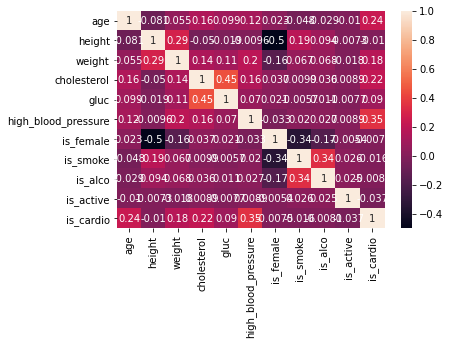

In [31]:
# 4.1
corr = df_typed.drop('id').toPandas().corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot=True)
plt.show()

In [32]:
columns_to_drop = ['is_smoke','is_alco','is_female']
df_typed = df_typed.drop(*columns_to_drop)

In [33]:
df_typed = df_typed.withColumn('bmi', (df_typed.weight / (df_typed.height ** 2) * 10000))
df_typed = df_typed.withColumn('weight_status', (when(col("bmi") < 25, 1).when(col("bmi") >= 30, 3).otherwise(2)))
columns_to_drop = ['height','weight','bmi']
df_typed = df_typed.drop(*columns_to_drop)

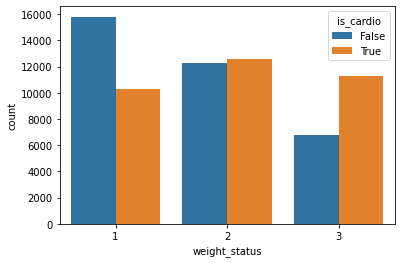

In [40]:
ax = sns.countplot(x="weight_status",hue="is_cardio",data=df_typed.toPandas())
plt.show()

In [41]:
# 6.3
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=["age","cholesterol","gluc","high_blood_pressure","is_active","weight_status"],
    outputCol="is_cardio")

In [45]:
transformed = assembler.transform(df_typed)

IllegalArgumentException: 'Output column is_cardio already exists.'

In [ ]:




model_tree = DecisionTree.trainClassifier(df_typed, numClasses=2, categoricalFeaturesInfo={},
                                     impurity='gini', maxDepth=5, maxBins=32)

print(model_tree.toDebugString())

# model_tree.save(sc, "models/treeModel")
# model_tree = DecisionTreeModel.load(sc, "models/treeModel")
#
#


In [ ]:

df_typed_features = df_typed.drop('cardio',axis=1)
X = df_typed_features
Y = df_typed['cardio']
clf_tree = tree.DecisionTreeClassifier(max_depth=3).fit(X, Y)

import graphviz
dot_data = tree.export_graphviz(clf_tree,
    out_file=None,
    feature_names=list(df_typed_features.columns),
    class_names=["Negative", "Positive"], # Comment under https://datascience.stackexchange.com/q/20415 by Takashi Yoshino: You can check clf.classes_ to confirm class order.
    filled=True,
    rounded=True)
graph = graphviz.Source(dot_data) 
graph.render("tree")

In [38]:
df_typed.show()

+---+-----+-----------+----+-------------------+---------+---------+-------------+
| id|  age|cholesterol|gluc|high_blood_pressure|is_active|is_cardio|weight_status|
+---+-----+-----------+----+-------------------+---------+---------+-------------+
|  0|18393|          1|   1|              false|     true|    false|            1|
|  1|20228|          3|   1|               true|     true|     true|            3|
|  2|18857|          3|   1|              false|    false|     true|            1|
|  3|17623|          1|   1|               true|     true|     true|            2|
|  4|17474|          1|   1|              false|    false|    false|            1|
|  8|21914|          2|   2|              false|    false|    false|            2|
|  9|22113|          3|   1|              false|     true|    false|            3|
| 12|22584|          3|   3|              false|     true|     true|            2|
| 13|17668|          1|   1|              false|     true|    false|            2|
| 14